# ESTADÍSTICAS AMBULATORIO HMN

Esta página provee una serie de pasos para procesar información a partir de archivos `.csv` específicos del **Hospital Materno Neonatal**.

Se provee, además, una serie de funciones que agilizan el procesamiento y generación de tablas y gráficos a partir de la información procesada.

In [43]:
# Get ambulatory csv file
!wget https://raw.githubusercontent.com/markitos314/statistical_analysis_for_patients_records/main/ambulatory_masked.csv

--2021-12-16 17:14:32--  https://raw.githubusercontent.com/markitos314/statistical_analysis_for_patients_records/main/ambulatory_masked.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5395026 (5.1M) [text/plain]
Saving to: ‘ambulatory_masked.csv.1’

ambulatory_masked.c 100%[===================>]   5.14M  --.-KB/s    in 0.04s   

2021-12-16 17:14:32 (130 MB/s) - ‘ambulatory_masked.csv.1’ saved [5395026/5395026]



## Importar las funciones para el procesamiento de datos

Las funciones específicas para el tratamiento de los archivos `.csv` se encuentran en un repositorio, de manera tal que pueden ser descargadas en bloque y luego importar la que sea necesaria.

Cada función tiene su *docstring* explicando qué es necesario ingresarle y qué devuelve, junto con el procesamiento que realiza en cada caso.

Para tener las funciones en nuestro directorio de trabajo, las descargamos con el siguiente comando: ⬇️

In [44]:
!wget https://raw.githubusercontent.com/markitos314/HMN/main/hmn_functions.py

--2021-12-16 17:14:32--  https://raw.githubusercontent.com/markitos314/HMN/main/hmn_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50413 (49K) [text/plain]
Saving to: ‘hmn_functions.py.1’

hmn_functions.py.1  100%[===================>]  49.23K  --.-KB/s    in 0.003s  

2021-12-16 17:14:33 (13.9 MB/s) - ‘hmn_functions.py.1’ saved [50413/50413]



In [45]:
csv_file = 'ambulatory_masked.csv'

## Uso de las funciones

Las funciones que hay disponibles son:

### preprocess_ambulatorio
Sirve particularmente para los `.csv` de la parte de ambulatirio, ya que los de emergencias tienen otra estructura. Para utilizarla, ejecutar lo siguiente:
  * `from hmn_functions import preprocess_ambulatorio`, y luego
  * `dataframe` = preprocess_ambulatorio('directorio/donde/se/encuentra/el/.csv')

> *Nota:* sustituir la palabra '*dataframe*' por el nombre que se le quiera dar a la variable (por ejemplo, ambulatorio_enero [si fuera de las atenciones de ambulatorio en enero], o ambulatorio_2021 [si fueran todas las atenciones de ambulatorio en el año 2021].

In [46]:
import pandas as pd
prueba = pd.read_csv(csv_file, index_col=False)
prueba.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,e3220155,d6c4f0c,a92c6ec86786e4a3e68f37d8e43f3c8d,b53eaa9a,14,2021-02-25,13:28,Infectología,Infecto Infantil,Consulta,Infectología Infantil,NaN,B24X,NaN,NaN,NaN
1,331db768,0f5ceec,ad8ef94636626ac299dd1004a4a43073,b53eaa9a,25,2021-05-31,11:27,Clínica Médica,Alto Riesgo y Puerperio,Consulta,205 L [Branciforti] Embarazo Alto Riesgo,NaN,DM2 Y EMBARAZO,NaN,NaN,NaN
2,331db768,0f5ceec,ad8ef94636626ac299dd1004a4a43073,b53eaa9a,25,2021-05-18,11:44,Clínica Médica,Alto Riesgo y Puerperio,Consulta,205 MJ [Guarneri] Embarazo Alto Riesgo,NaN,DM2 Y EMBARAZO,NaN,NaN,NaN
3,38e8c4f5,c43ec54,9cac2e9a673aa782e3371dc85a79d55c,b53eaa9a,3,2021-02-17,10:54,Fonoaudiología,Fonoaudiología,Consulta,FONO J - C19 SEGUIMIENTO DE RIESGO,NaN,FONOAUDIOLOGÍA - SEGUIMIENTO RNAR,NaN,NaN,NaN
4,726d3f39,7c049f3,248075115173649d49827604bb1932a6,b53eaa9a,28,2021-06-21,18:25,Odontología,Odontologia Mujeres,Consulta,113 LMJ [T. Tarde] Adulto Mujeres,NaN,Caries.,NaN,NaN,NaN
5,760af333,400181a,0a2181e154b330ae32cedf5eff3c073a,b53eaa9a,3,2021-01-19,10:17,Fonoaudiología,Fonoaudiología,Consulta,FONO J - C19 SEGUIMIENTO DE RIESGO,NaN,SEGUIMIENTO RNR,NaN,NaN,NaN
6,6c8368b9,370d26a,ca9070a5db3f579a891498b3e0a55637,b53eaa9a,39,2021-04-27,12:21,Infectología,Infectologia Adulto,Consulta,21 Infectología Adulto LXV,NaN,NaN,B24X,Enfermedad por virus de la inmunodeficiencia h...,NaN
7,0c90f659,f0e4cf7,025d8da1940793112f1e00b4bcd6463a,b53eaa9a,35,2021-02-08,12:07,Salud Mental,Psiquiatría,Consulta,106 [Monje] Psiquiatría,NaN,F431,NaN,NaN,NaN
8,1ab523a3,0dac040,6158084c2f0128ffbea0ed40b27edf25,b53eaa9a,35,2021-01-10,10:44,Ginecología,TGI,PAPANICOLAOU Y COLPOSCOPIA,212 LM [Filippi] TGI,NaN,control,NaN,NaN,NaN
9,462ae8bf,ad93d2c,462764ad94dbc291d22b71091b1ce57d,b53eaa9a,46,2021-03-28,08:53,Salud Mental,Psicología,Consulta,106 M [Filippi] Psicoterapia,NaN,NaN,F409,"Trastorno fóbico de ansiedad, no especificado",NaN


In [47]:
# Ejemplo:
from hmn_functions import preprocess_ambulatorio
ambulatorio = preprocess_ambulatorio(csv_file)

In [48]:
ambulatorio

,DNI,NHC,PACIENTE,SEXO,EDAD,FECHA_HORA_TURNO,SERVICIO,SECCION,PRESTACION,AGENDA,MOTIVO_ALTA,DIAGNOSTICO,CIE10,DESC_CIE10
0,9e18b92c,f706b13,fda6ba14096cf5a70538b24f5d3c3f90,b53eaa9a,19,2021-01-02 08:01:00,Adolescencia,Adolescencia,Consulta,214 L [Roveda] Adolscencia,NaN,NaN,R10,Dolor abdominal y pélvico
1,9e18b92c,f706b13,fda6ba14096cf5a70538b24f5d3c3f90,b53eaa9a,19,2021-01-02 08:01:00,Adolescencia,Adolescencia,Consulta,214 L [Roveda] Adolscencia,NaN,NaN,Z30,Atención para la anticoncepción
2,aae4e9db,e148105,9d48fc9dd6cb5d8303004c6227cc6e29,b53eaa9a,18,2021-01-02 09:58:00,Adolescencia,Adolescencia,Consulta,214 L [Roveda] Adolscencia,NaN,NaN,Z30,Atención para la anticoncepción
3,3382e394,e24aee9,b0679a908d61a0f2c8d15022e35efb52,b53eaa9a,20,2021-01-02 11:47:00,Adolescencia,Adolescencia,Consulta,214 L [Roveda] Adolscencia,NaN,NaN,Z30,Atención para la anticoncepción
4,3382e394,e24aee9,b0679a908d61a0f2c8d15022e35efb52,b53eaa9a,21,2021-01-02 11:47:00,Adolescencia,Adolescencia,Consulta,214 L [Roveda] Adolscencia,NaN,control puerperio,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30738,f15239bf,8d018dd,879de61fe95cadfc5a00b1ac0ea491b3,b53eaa9a,19,2021-06-28 13:33:00,Servicio Social,Servicio Social,Consulta,TRABAJO SOCIAL,NaN,VIF,NaN,NaN
30739,719cbf31,1108070,d67279211dfafee3a33d7cfe030f8181,b53eaa9a,55,2021-06-29 11:15:00,Servicio Social,Servicio Social,Consulta,TRABAJO SOCIAL,NaN,sin obra social,NaN,NaN
30740,1bfafe4b,2d82af0,9fa3d5210a59a74e2544aea0766cc089,b53eaa9a,45,2021-06-29 12:56:00,Servicio Social,Servicio Social,Consulta,TRABAJO SOCIAL,NaN,DBT,NaN,NaN
30741,5f40858b,3068dd5,084eecd707321c0211c6fca863d0eb42,b53eaa9a,23,2021-06-30 13:33:00,Servicio Social,Servicio Social,Consulta,TRABAJO SOCIAL,NaN,NaN,NaN,NaN


### concatenate_dfs
Se usa si se procesaron varios `.csv` y se quieren unir para que queden en uno solo. Para utilizarla, ejecutar lo siguiente:
  * `from hmn_functions import concatenate_dfs`, y luego
  * concatenate_dfs([dataframe1, dataframe2, dataframe3])

### atenciones
Imprime una tabla y/o un gráfico de torta de las atenciones del dataframe en el período del dataframe ingresado, divididas por servicio o por sección. Para utilizarla, ejecutar lo siguiente:
  * `from hmn_functions import atenciones`, y luego
  * atenciones(dataframe)

Por defecto imprime el gráfico de barras **por servicio**. Para elegir criterios cuando se llama la función agregar las siguientes variables:
* `por_seccion = True` (por defecto) --> para incluir gráficos divididos por sección. De lo contrario, `por_seccion = False`
* `por_servicio = True` --> para incluir gráficos divididos por servicio. De lo contrario, `por_servicio = False`
* `barra = True` (por defecto)  --> para incluir gráfico de barra. De lo contrario, `barra = False`
* `torta = True` --> para incluir gráfico de torta. De lo contrario, `torta = False`

Atenciones por servicio (Total = 30743)



,SERVICIO,CANTIDADES,% TOTAL
0,Obstetricia,9835,31.991022
1,Ginecología,3448,11.215561
2,Salud Mental,2803,9.117523
3,Infectología,2709,8.811762
4,Fonoaudiología,2387,7.764369
5,Adolescencia,1856,6.037147
6,Neonatología,1585,5.155645
7,SSR,1537,4.999512
8,Hemoterapia,1137,3.698403
9,Endocrinología,648,2.107797


<Figure size 432x288 with 0 Axes>

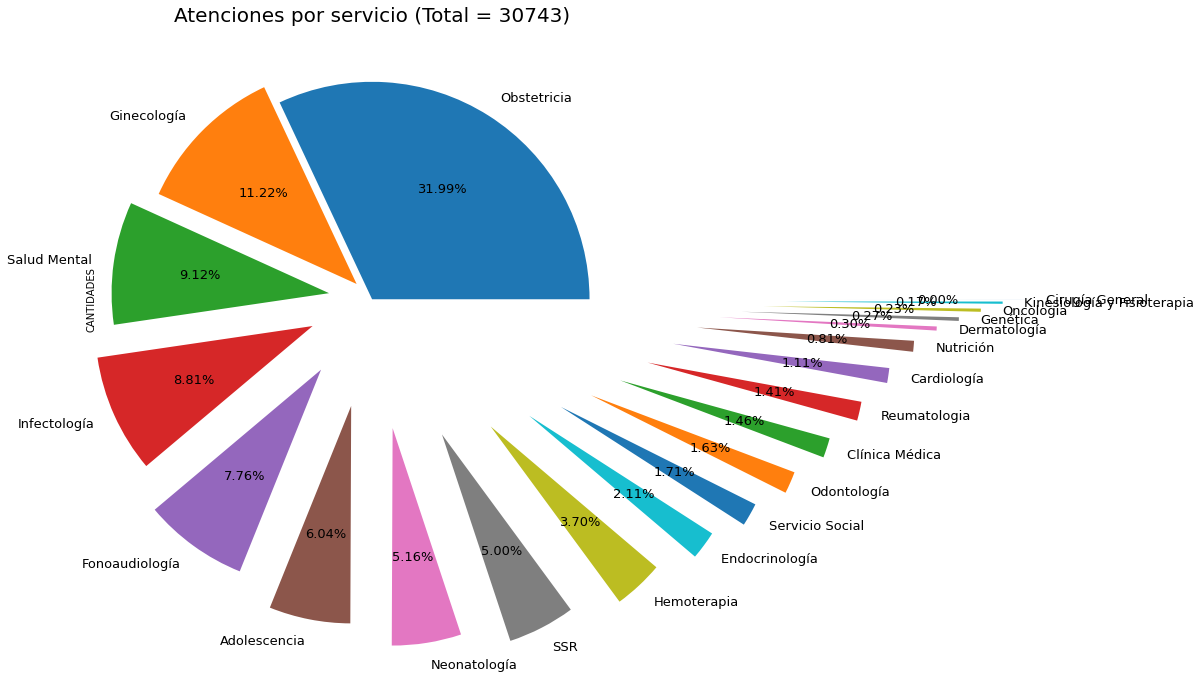

<Figure size 432x288 with 0 Axes>

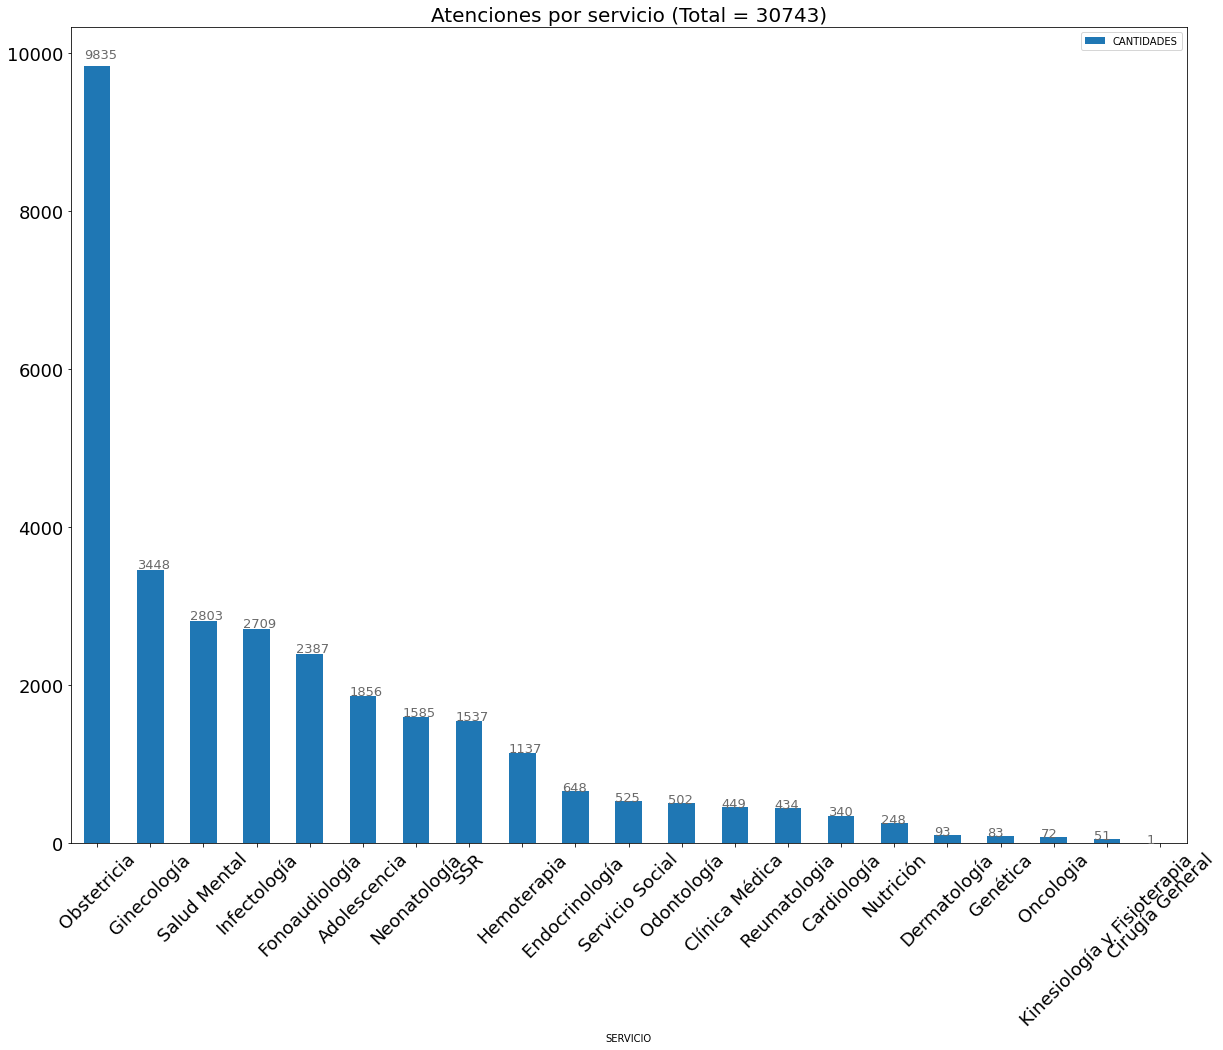

In [49]:
# Ejemplo:
from hmn_functions import atenciones
atenciones(ambulatorio, por_seccion=False, por_servicio=True, torta=True, barra=True)

### atenciones_por_hora_ambulatorio
Imprime un gráfico de barras de las atenciones en cada hora, en el período del dataframe ingresado. Y luego un gráfico de barra de las atenciones en cada hora de cada sección en el período del dataframe ingresado.

Se puede elegir imprimir la discriminación por servicio, con la variable `por_servicio = True` o `por_servicio = False` respectivamente. 

Por defecto `por_servicio = False`

Para utilizarla, ejecutar lo siguiente:
  * `from hmn_functions import atenciones_por_hora_ambulatorio`, y luego
  * atenciones_por_hora_ambulatorio(dataframe, por_servicio=True)

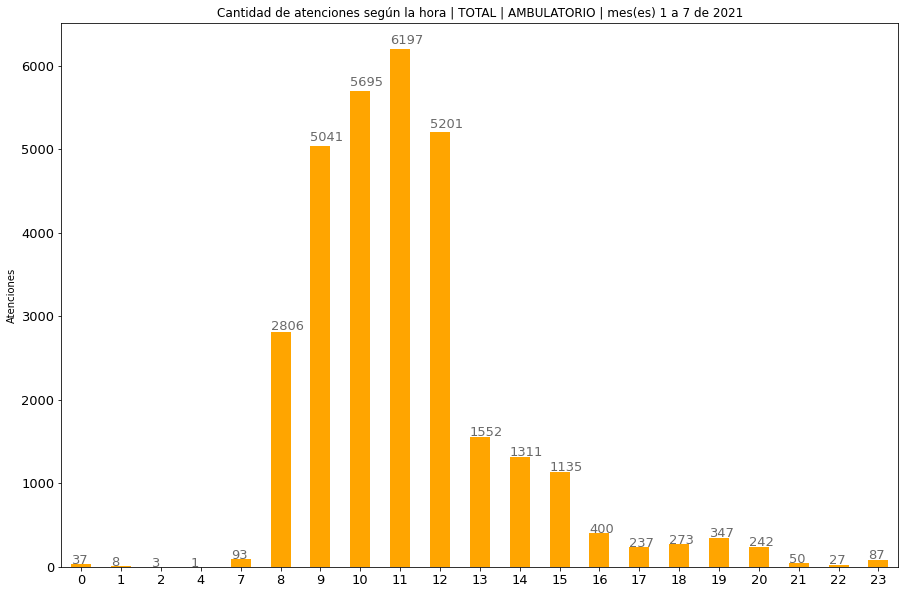

In [50]:
# Ejemplo:
from hmn_functions import atenciones_por_hora_ambulatorio
atenciones_por_hora_ambulatorio(ambulatorio)

### atenciones_por_dia_semana_ambulatorio
Imprime un gráfico de barras de las atenciones por día de la semana, en el período del dataframe ingresado. Y luego un gráfico de barra de las atenciones por día de la semana de cada sección en el período del dataframe ingresado. 

Se puede elegir imprimir la discriminación por servicio, con la variable `por_servicio = True` o `por_servicio = False` respectivamente. 

Por defecto `por_servicio = False`

Para utilizarla, ejecutar lo siguiente:
  * `from hmn_functions import atenciones_por_dia_semana`, y luego
  * atenciones_por_dia_semana(dataframe, por_servicio=True)

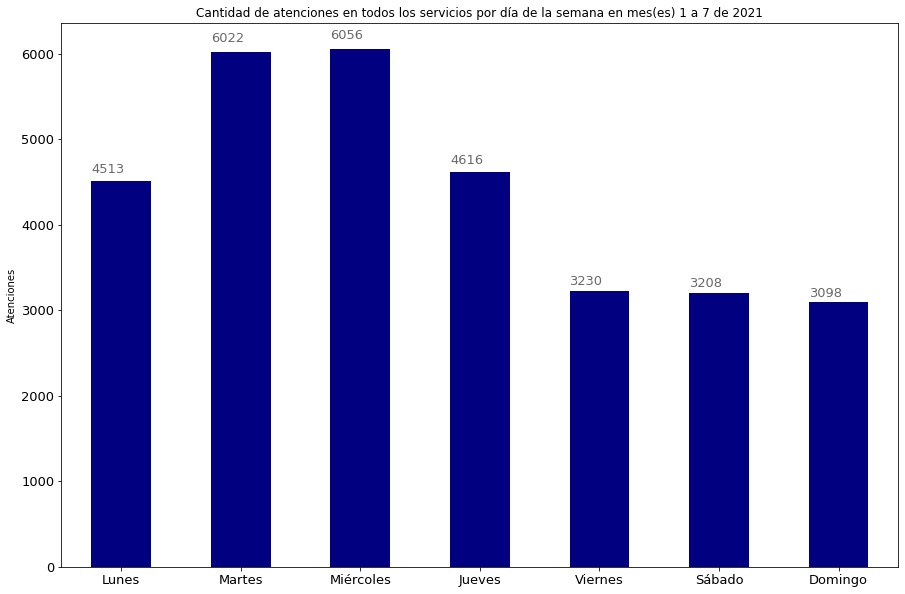

In [51]:
# Ejemplo:
from hmn_functions import atenciones_por_dia_semana_ambulatorio
atenciones_por_dia_semana_ambulatorio(ambulatorio)

### atenciones_grupo_etareo_ambulatorio
Imprime un gráfico de tortas de las atenciones por grupo etáreo, en el período del dataframe ingresado. Y luego un gráfico de barra de las atenciones por día de la semana de cada sección en el período del dataframe ingresado. 

Por conveniencia, las franjas etáreas se dividieron de la siguiente manera:

* 0 años,
* 1 a 13 años,
* 14 a 21 años,
* 22 a 40 años,
* 41 a 60 años,
* 61 ó más años.

Se puede elegir imprimir la discriminación por servicio, con la variable `por_servicio = True` o `por_servicio = False` respectivamente. 

Por defecto `por_servicio = False`

Para utilizarla, ejecutar lo siguiente:

  * `from hmn_functions import atenciones_grupo_etareo_ambulatorio`, y luego
  * atenciones_grupo_etareo_ambulatorio(dataframe)

/content/hmn_functions.py:793: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15,10))


<Figure size 432x288 with 0 Axes>

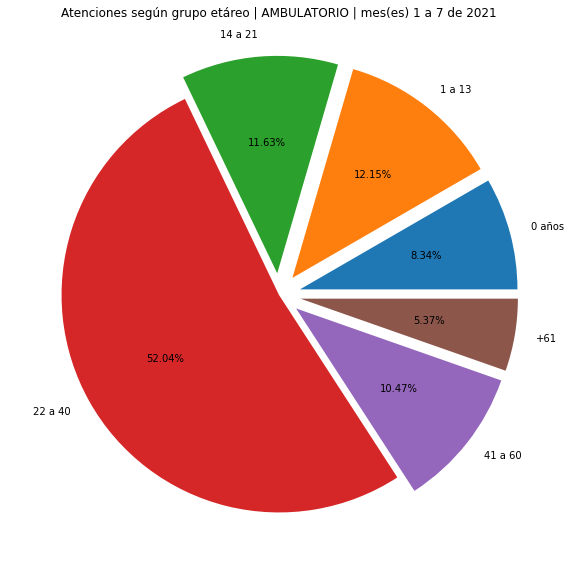

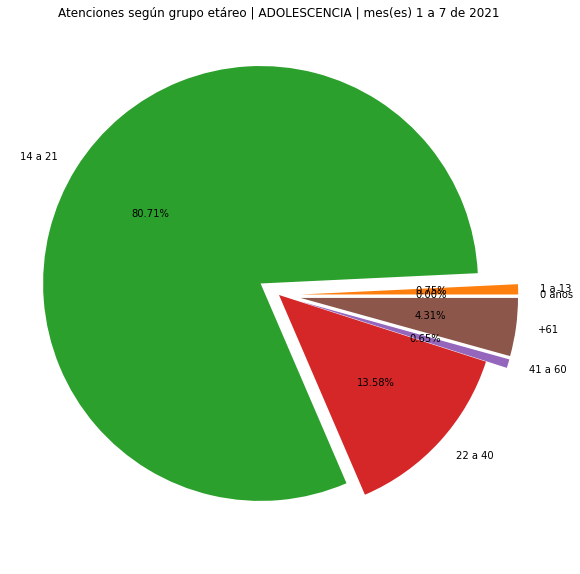

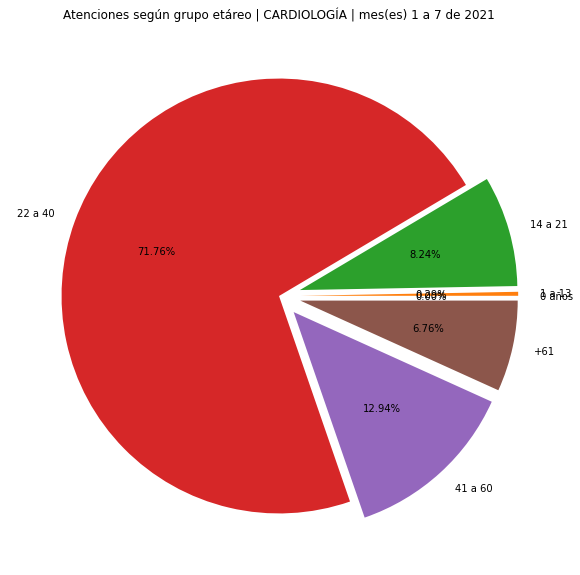

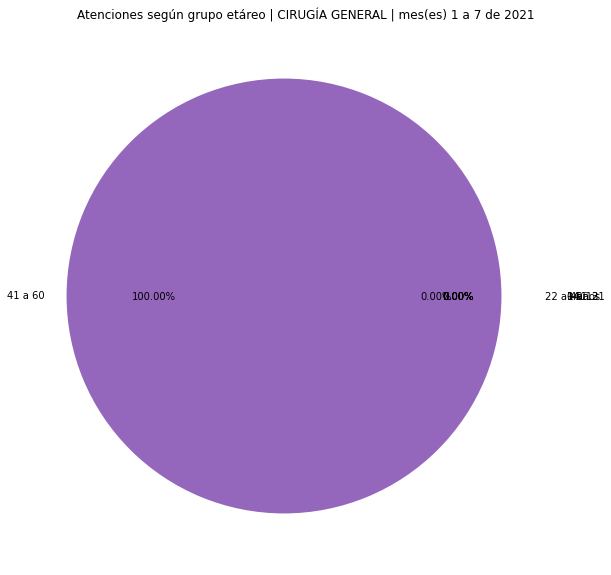

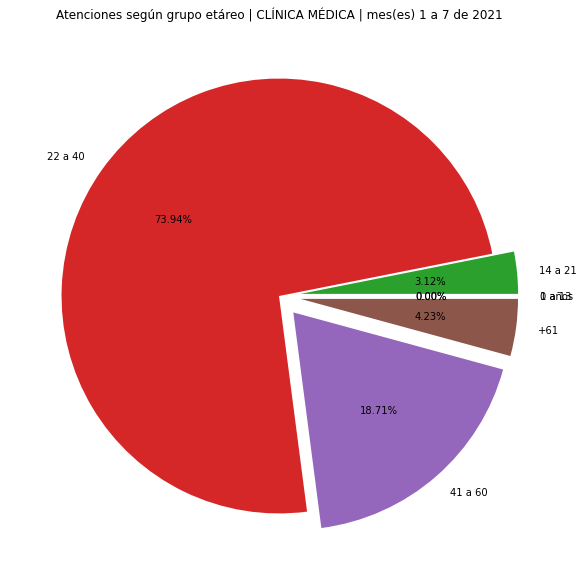

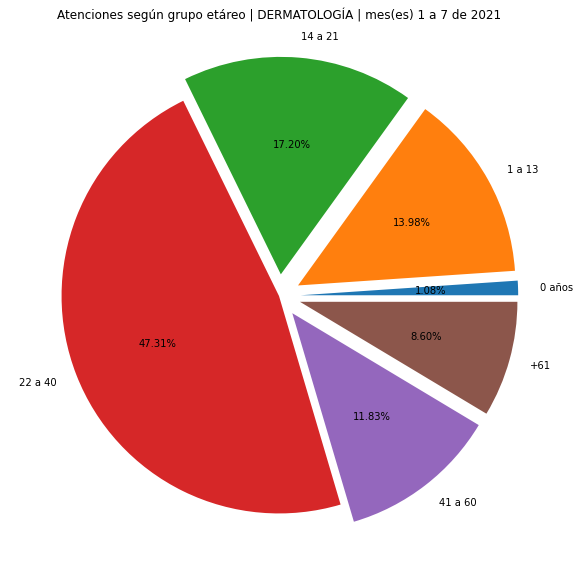

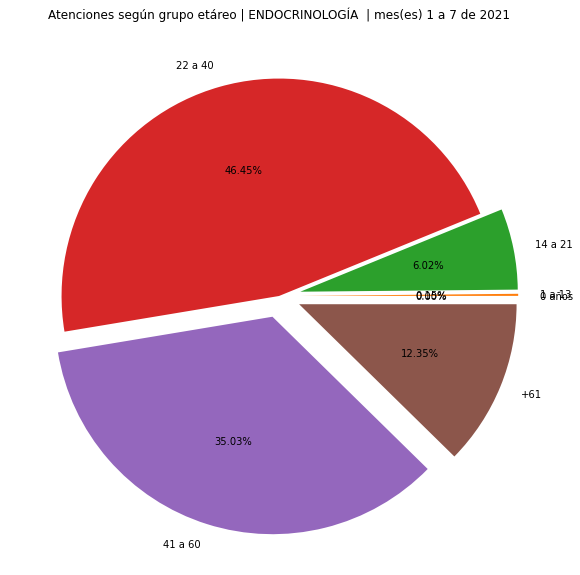

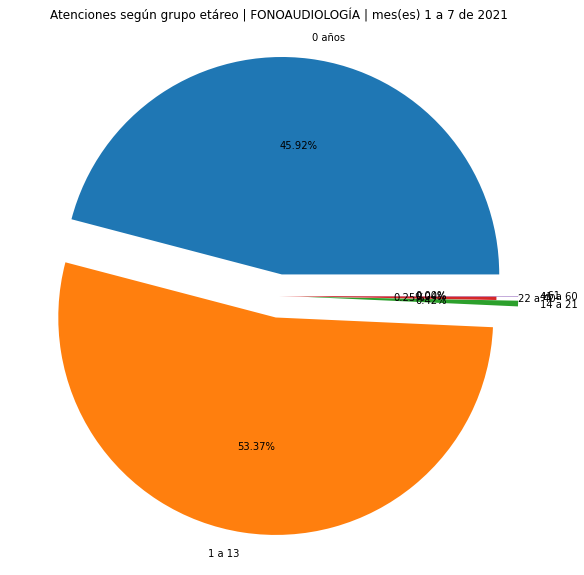

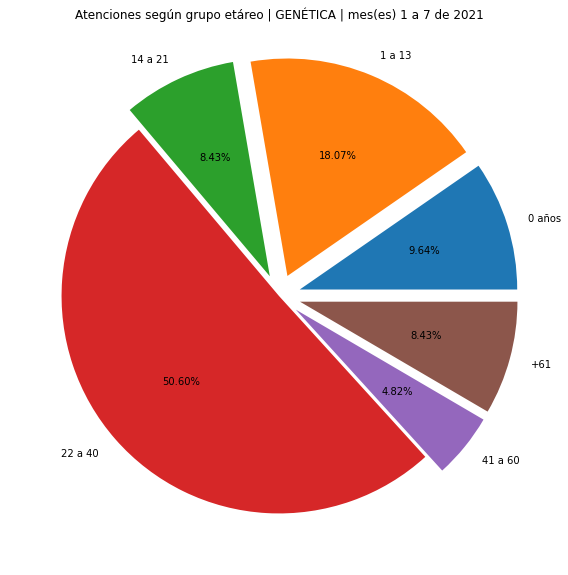

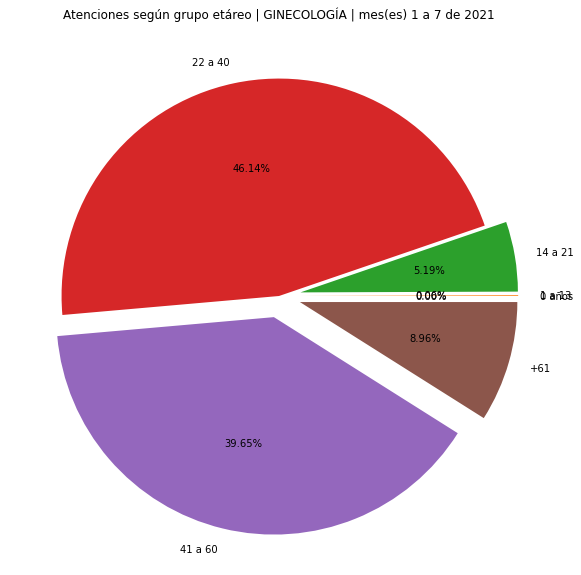

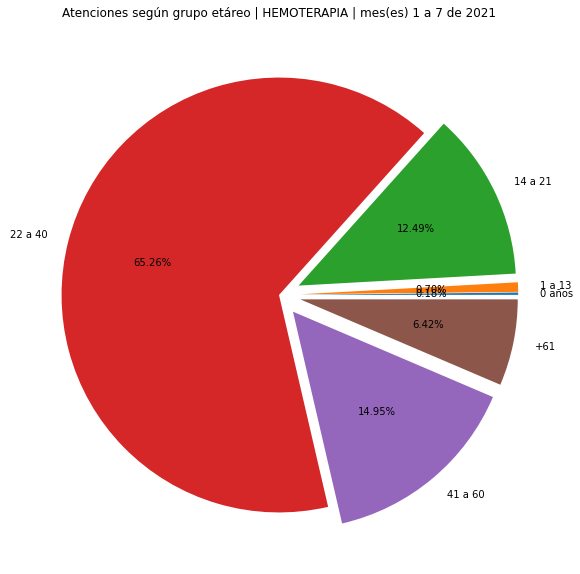

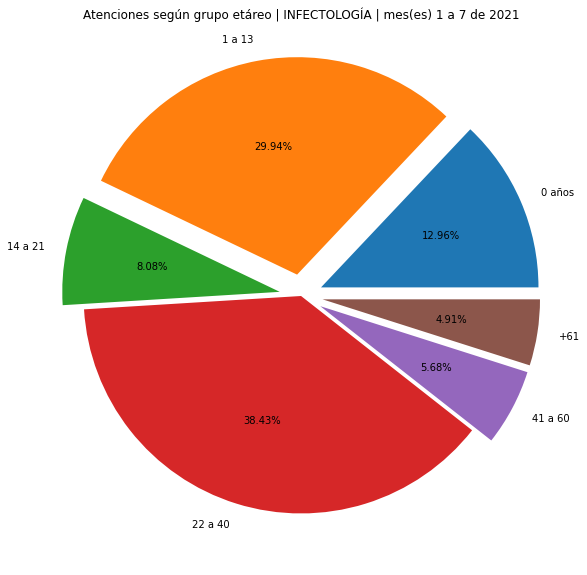

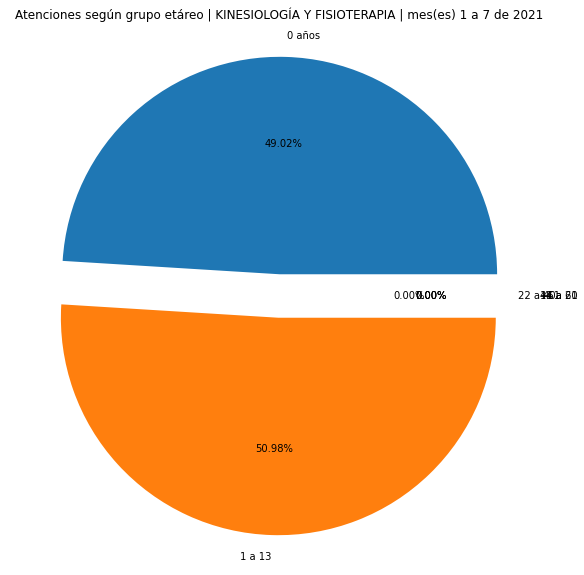

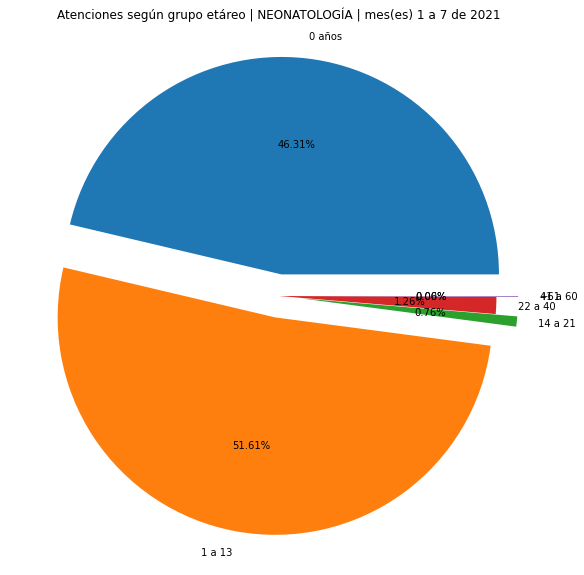

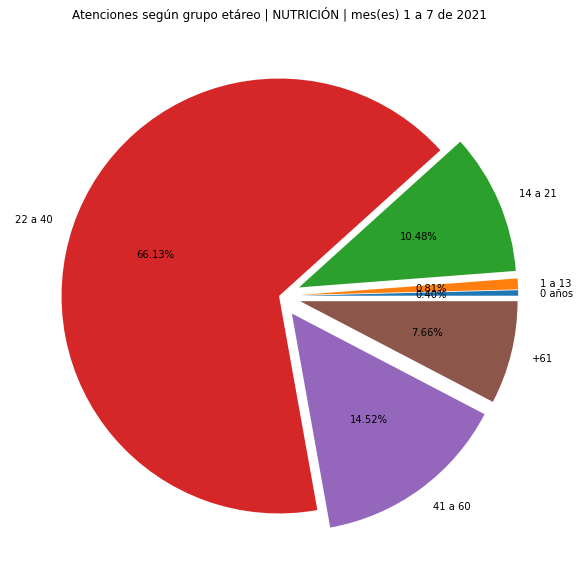

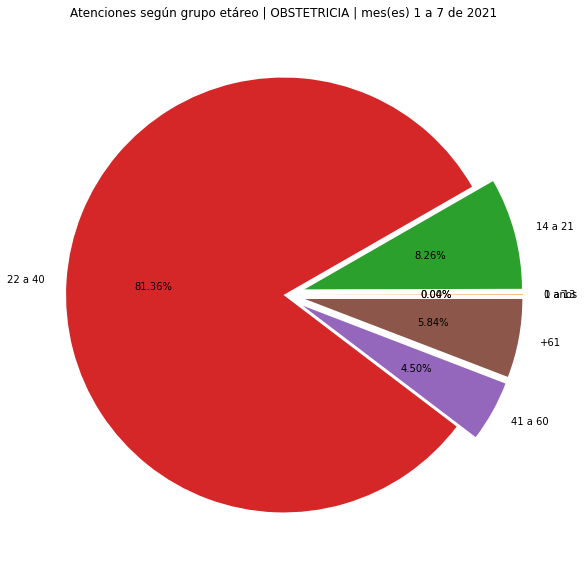

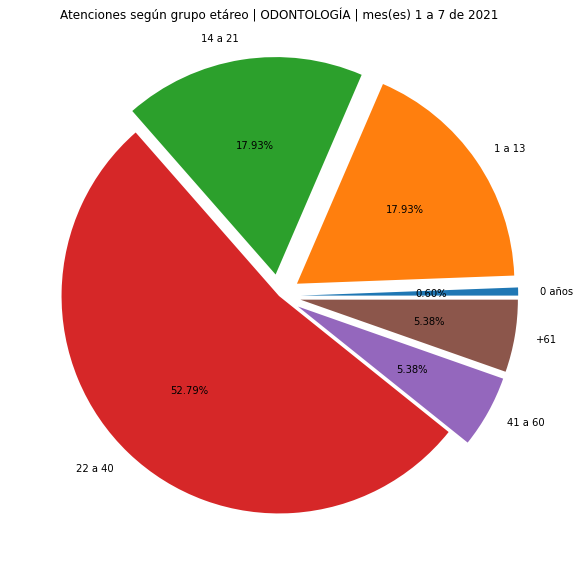

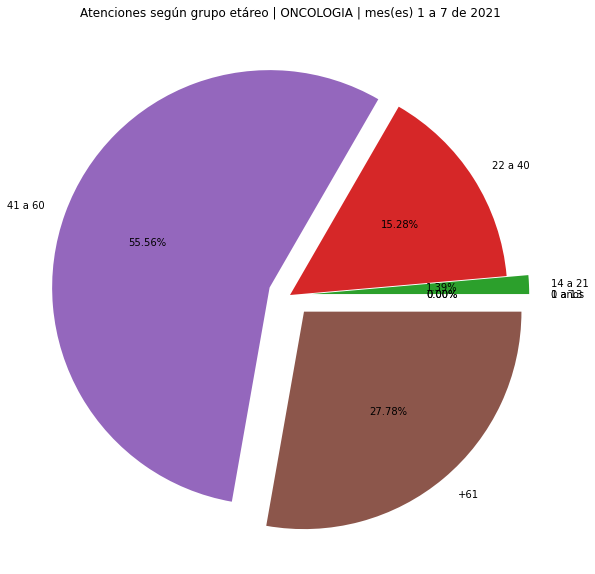

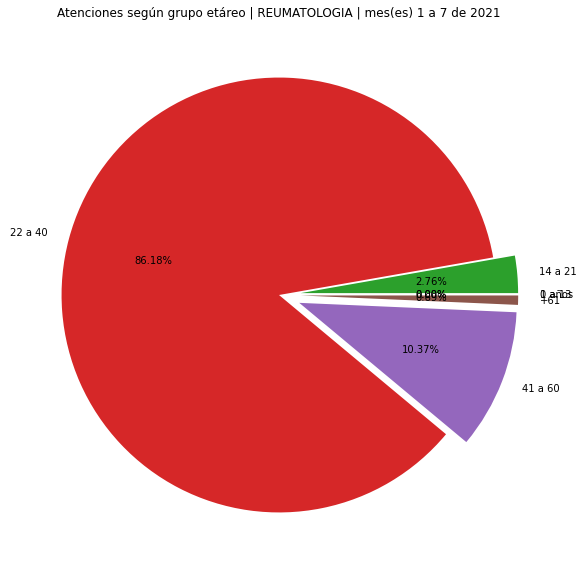

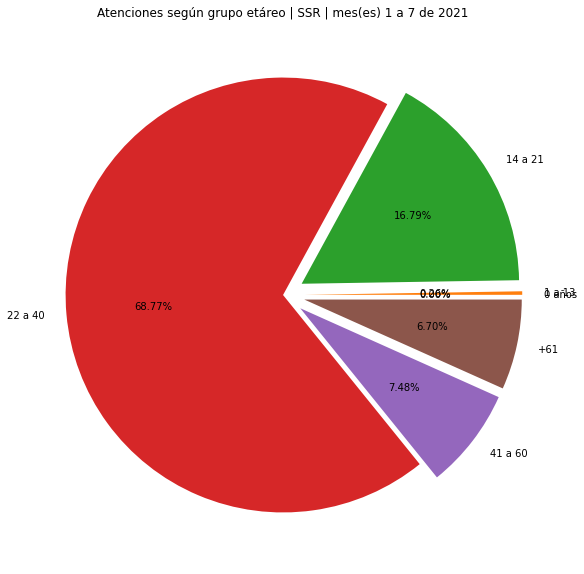

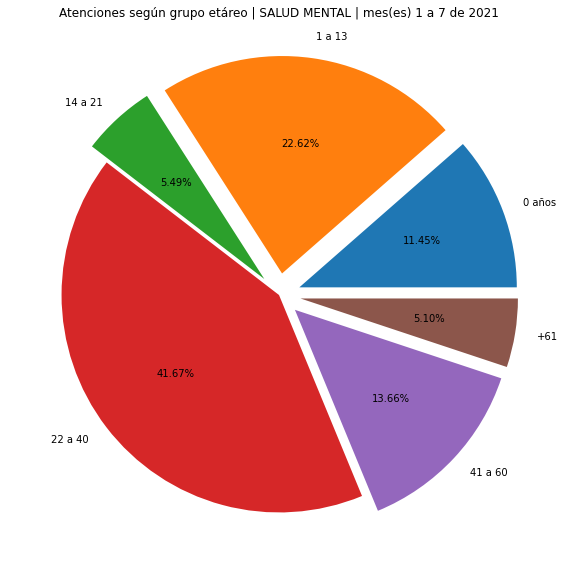

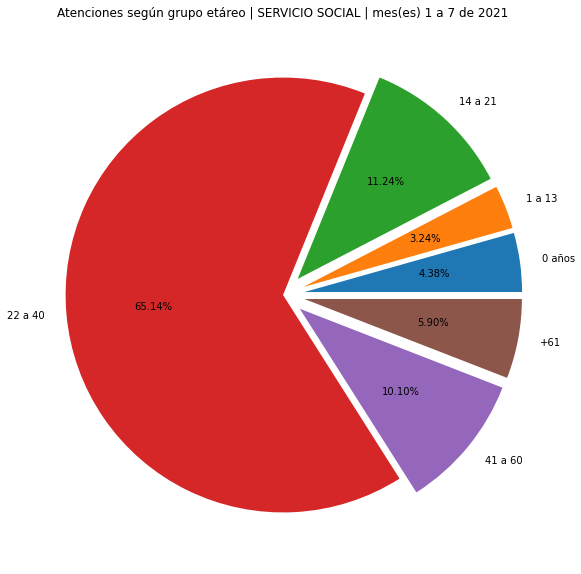

In [52]:
# Ejemplo:
from hmn_functions import atenciones_grupo_etareo_ambulatorio
atenciones_grupo_etareo_ambulatorio(ambulatorio, por_servicio=True)

### motivo_alta
Imprime una tabla y un gráfico de barras horizontal de los distintos motivos de alta, en el período del dataframe ingresado. Y luego un gráfico de barra de las atenciones por día de la semana de cada sección en el período del dataframe ingresado.

Para utilizarla, ejecutar lo siguiente:

  * `from hmn_functions import motivo_alta`, y luego
  * motivo_alta(dataframe)

,MOTIVO_ALTA,CANTIDAD
0,NaN,29558
1,Tratamiento médico,814
2,Otro motivo,161
3,Tratamiento quirúrgico,132
4,Mejoría Clínica,78


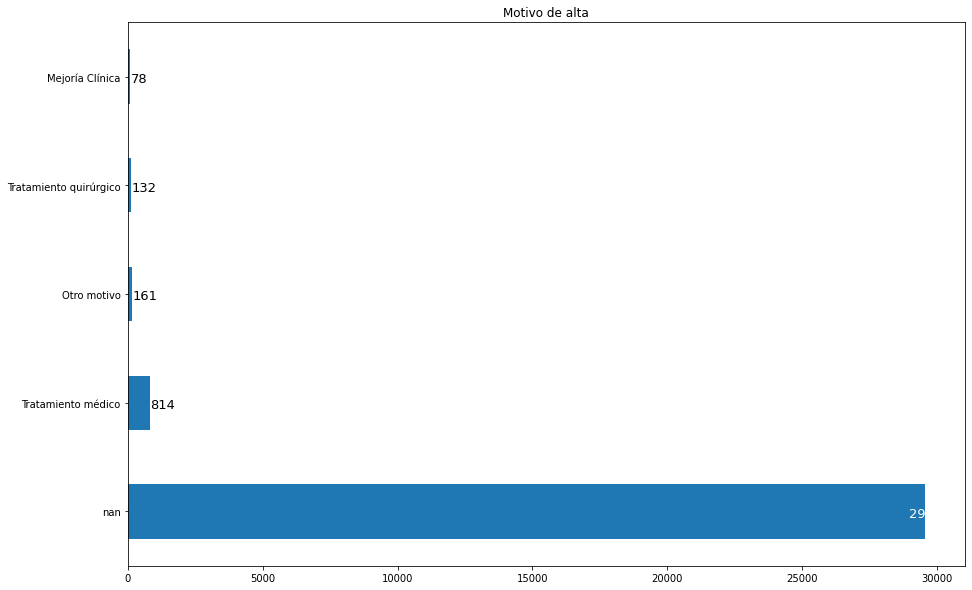

In [53]:
# Ejemplo:
from hmn_functions import motivo_alta
motivo_alta(ambulatorio)

### top_20_cod_diagnostics_ambulatorio
Imprime un gráfico de barras de los 20 diagnósticos más repetidos (codificados), en el período del dataframe ingresado. Y luego un gráfico de barra de los 20 diagnósticos más repetidos (codificados) por sección en el período del dataframe ingresado.

> 🔑 **Nota:** Si la sección tiene sólo diagnósticos sin codificar (figurarán con la leyenda 'nan', se graficarán sólo esos. De lo contrario los demás gráficos NO muestran los diagnósticos no codificados. 

Los totales figuran en el título del gráfico.

Por defecto imprime el gráfico de barras **por servicio**. Para elegir criterios cuando se llama la función agregar las siguientes variables:
* `por_seccion = True` (por defecto) --> para incluir gráficos divididos por sección. De lo contrario, `por_seccion = False`
* `por_servicio = True` --> para incluir gráficos divididos por servicio. De lo contrario, `por_servicio = False`

> 🔑**Nota:** las variables `por_seccion` y `por_servicio` NO pueden estar en `True` al mismo tiempo.

Para utilizarla, ejecutar lo siguiente:

  * `from hmn_functions import top_20_cod_diagnostics_ambulatorio`, y luego
  * top_20_cod_diagnostics_ambulatorio(dataframe)


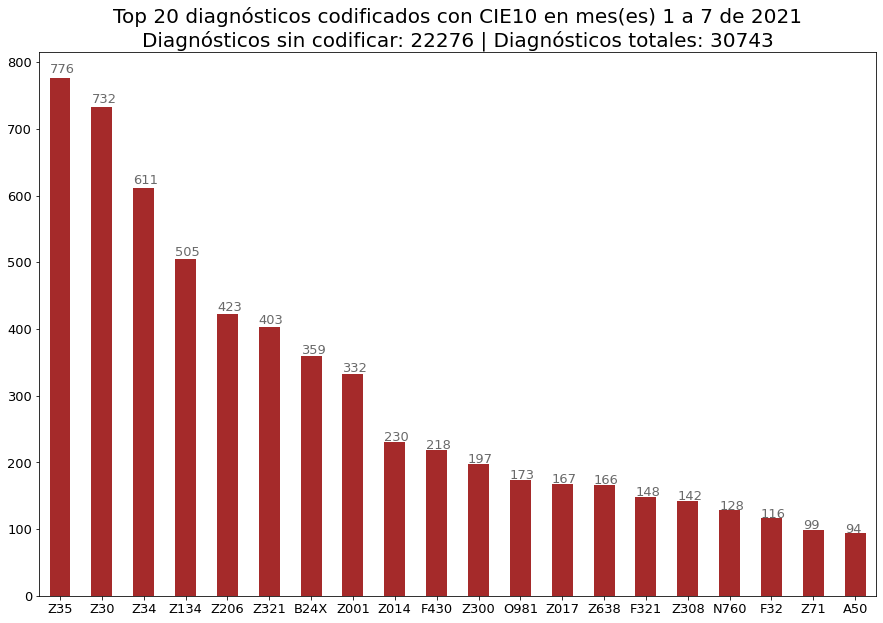

In [54]:
# Ejemplo:
from hmn_functions import top_20_cod_diagnostics_ambulatorio
top_20_cod_diagnostics_ambulatorio(ambulatorio)